In [1]:
import datetime
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

**Sleep_csv**

In Bed Date: 1 and 2 refer to the first and second day of data recording, respectively.
In Bed Time: time of the day (hours:minutes) when the user went to the bed.
Out Bed Date: 1 and 2 refer to the first and second day of data recording, respectively.
Out Bed Time: time of the day (hours:minutes) when the user went out of the bed.
Onset Date: 1 and 2 refer to the first and second day of data recording, respectively.
Onset Time: time of the day (hours:minutes) when the user falls asleep.
Latency Efficiency: percentage of sleep time on total sleep in bed.
Total Minutes in Bed: minutes spent in the bed per night.
Total Sleep Time (TST): length of the sleep per night expressed in minutes.
Wake After Sleep Onset (WASO): time spent awake after falling asleep the first time.
Number of Awakenings during the night
Average Awakening Length: time in seconds spent awakening during the night.
Movement Index: number of minutes without movement expressed as a percentage of the movement phase (i.e., number of period with arm movement).
Fragmentation Index: number of minutes with movement expressed as a percentage of the immobile phase (i.e., the number of period without arm movement).
Sleep Fragmentation Index: ratio between the Movement and Fragmentation indices.

In [63]:
sleep_list = []

for num in range(1,23):
    user_sleep_df = pd.read_csv(f'DataPaper/user_{num}/sleep.csv')
    user_sleep_df['User'] = num
    user_sleep_df.set_index(['User'])
    sleep_list.append(user_sleep_df)
    
sleep_df = pd.concat(sleep_list)
sleep_df

,Unnamed: 0,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index,User
0,0,2,00:46,2,03:31,2,00:46,0,87.27,165,144,21,9,2.33,9.091,10,19.091,1
1,1,2,03:57,2,07:30,2,03:57,0,92.02,213,196,17,9,1.89,8.92,0,8.92,1
0,0,2,00:50,2,06:22,2,00:54,4,73.49,332,244,84,18,4.67,15.06,5.556,20.616,2
0,0,1,22:29,1,05:52,1,22:32,3,79.23,443,351,89,16,5.56,18.962,0,18.962,3
0,0,2,00:57,2,07:10,2,01:01,4,85.52,373,319,50,28,1.79,8.847,14.286,23.133,4
0,0,1,23:56,1,06:42,1,23:56,0,85.71,406,348,58,21,2.76,11.576,9.524,21.1,5
0,0,2,02:27,2,09:02,2,02:27,0,84.3,395,333,62,20,3.1,10.633,4.762,15.395,6
0,0,2,00:28,2,08:02,2,00:28,0,75.33,454,342,112,31,3.61,17.401,28.125,45.526,7
0,0,2,00:17,2,07:13,2,00:20,3,80.77,416,336,77,27,2.85,17.308,25.926,43.234,8
0,0,2,00:30,2,11:00,2,00:33,3,91.75,630,578,49,4,12.25,8.095,0,8.095,9


In [3]:
sleep_df_cleaned=sleep_df[['Total Minutes in Bed', 'Total Sleep Time (TST)','Number of Awakenings', 'User',]]
sleep_df_cleaned

,Total Minutes in Bed,Total Sleep Time (TST),Number of Awakenings,User
0,165,144,9,1
1,213,196,9,1
0,332,244,18,2
0,443,351,16,3
0,373,319,28,4
0,406,348,21,5
0,395,333,20,6
0,454,342,31,7
0,416,336,27,8
0,630,578,4,9


**questionnaire.csv - scores for all the questionnaires:**

MEQ: Morningness-Eveningness Questionnaire value. The chronotype score is ranging from 16 to 86: scores of 41 and below indicate Evening types, scores of 59 and above indicate Morning types, scores between 42-58 indicate intermediate types [1].
STAI1: State Anxiety value obtained from State-Trait Anxiety Inventory. The results are range from 20 to 80. Scores less than 31 may indicate low or no anxiety, scores between 31 and 49 an average level of anxiety or borderline levels, and scores higher than 50 a high level of anxiety or positive test results [2].
STAI2: Trait Anxiety value obtained from the State-Trait Anxiety Inventory. The results are range from 20 to 80. Scores less than 31 may indicate low or no anxiety, scores between 31 and 49 an average level of anxiety or borderline levels, and scores higher than 50 a high level of anxiety or positive test results [2].
PSQI: Pittsburgh Sleep Quality Questionnaire Index. It gives a score rating from 0 to 21, with values lower than 6 indicating good sleep quality [3].
BIS/BAS: Behavioural avoidance/inhibition index [4]. BIS/BAS scales are a typical measure of reinforcement sensitivity theory that establish biological roots in personality characteristics, derived from neuropsychological differences. The BIS/BAS scales comprise a self‐report measure of avoidance and approach tendencies that contains four sub-factors (A high score in one of the subscale describes the degree of that temperamental characteristic for the individual, according to the original sample):
Bis facet reflects subject sensitivity toward aversive events that promote avoidance behaviours.
Drive describes individual persistence and motivational intensity.
Reward corresponds to Reward Responsiveness that indicates a propensity to show a higher degree of positive emotion for goal attainment.
Fun corresponds to Fun-Seeking that is related to impulsivity and immediate reward due to sensory stimuli or risky situations.
Daily_stress: Daily Stress Inventory value (DSI) is a 58 items self-reported measures which allows a person to indicate the events they experienced in the last 24 hours. After indicating which event occurred, they indicate the stressfulness of the invent on a Likert scale from 1 (occurred but was not stressful) to 7 (Cause me to panic). It gives a score between 0 and 406. The higher is this values, the higher is the frequency and degree of the events and the perceived daily stress [5].
PANAS: Positive and Negative Affect Schedule. It gives a score rating between 5 and 50 for both positive and negative emotions [6]. The higher is the PANAS value, the higher is the perceived emotion. Columns name with 10, 14, 22 and 9+1 refer to the time of the day when the questionnaire is filled in. 9+1 indicates the 9 AM of the second recording day.

In [62]:
stress_list = []

for num in range(1,23):
    user_stress_df = pd.read_csv(f'DataPaper/user_{num}/questionnaire.csv')
    user_stress_df['User'] = num
    user_stress_df.set_index(['User'])
#     user_sleep_df = user_sleep_df.merge(stress_df)
    stress_list.append(user_stress_df)
    
user_stress_df = pd.concat(stress_list)
user_stress_df

,Unnamed: 0,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1,User
0,0,47.0,41.0,43.0,5.0,23.0,22.0,21.0,14.0,14.0,21.0,17.0,12.0,18.0,17.0,11.0,13.0,13.0,10.0,10.0,1
0,0,52.0,24.0,39.0,7.0,26.0,26.0,21.0,12.0,6.0,37.0,32.0,24.0,27.0,33.0,11.0,10.0,16.0,17.0,18.0,2
0,0,59.0,27.0,27.0,8.0,11.0,19.0,18.0,12.0,6.0,35.0,34.0,31.0,28.0,35.0,11.0,12.0,11.0,12.0,11.0,3
0,0,60.0,28.0,40.0,4.0,10.0,20.0,17.0,13.0,14.0,30.0,27.0,22.0,19.0,26.0,11.0,13.0,15.0,14.0,14.0,4
0,0,52.0,54.0,47.0,8.0,41.0,25.0,23.0,14.0,15.0,30.0,25.0,31.0,27.0,31.0,26.0,17.0,17.0,15.0,16.0,5
0,0,48.0,32.0,47.0,9.0,41.0,19.0,19.0,13.0,15.0,27.0,25.0,30.0,25.0,14.0,13.0,12.0,13.0,15.0,16.0,6
0,0,46.0,33.0,0.0,7.0,69.0,19.0,19.0,12.0,6.0,22.0,13.0,13.0,11.0,13.0,11.0,13.0,16.0,14.0,13.0,7
0,0,64.0,32.0,39.0,3.0,74.0,24.0,18.0,12.0,9.0,36.0,25.0,30.0,21.0,24.0,14.0,11.0,10.0,12.0,10.0,8
0,0,44.0,36.0,41.0,9.0,38.0,20.0,18.0,14.0,10.0,29.0,34.0,35.0,22.0,24.0,11.0,11.0,13.0,16.0,15.0,9
0,0,38.0,39.0,46.0,4.0,14.0,19.0,16.0,16.0,14.0,28.0,23.0,21.0,18.0,23.0,15.0,23.0,23.0,27.0,12.0,10


In [5]:
# user_stress_df['Anxiety']=(user_stress_df['STAI1']+user_stress_df['STAI2'])/2
# user_stress_df
# #Add the split value into a new column called rating and convert the values to float.
# ==pd.to_numeric(movies_score[0])
# clean_movies_df
# user_stress_df['Anxiety']=''


In [6]:
stress_list_cleaned= user_stress_df[['STAI1','STAI2','Pittsburgh', 'Daily_stress', 'User' ]]
stress_list_cleaned.head()

,STAI1,STAI2,Pittsburgh,Daily_stress,User
0,41.0,43.0,5.0,23.0,1
0,24.0,39.0,7.0,26.0,2
0,27.0,27.0,8.0,11.0,3
0,28.0,40.0,4.0,10.0,4
0,54.0,47.0,8.0,41.0,5


In [31]:
new_merge=pd.merge(stress_list_cleaned, sleep_df_cleaned, on=['User'])
new_merge=new_merge.astype(float)
new_merge.head()

,STAI1,STAI2,Pittsburgh,Daily_stress,User,Total Minutes in Bed,Total Sleep Time (TST),Number of Awakenings
0,41.0,43.0,5.0,23.0,1.0,165.0,144.0,9.0
1,41.0,43.0,5.0,23.0,1.0,213.0,196.0,9.0
2,24.0,39.0,7.0,26.0,2.0,332.0,244.0,18.0
3,27.0,27.0,8.0,11.0,3.0,443.0,351.0,16.0
4,28.0,40.0,4.0,10.0,4.0,373.0,319.0,28.0


In [243]:
new_merge.corr()

,STAI1,STAI2,Pittsburgh,Daily_stress,User,Total Minutes in Bed,Total Sleep Time (TST),Number of Awakenings
STAI1,1.000000,0.326809,-0.041582,-0.000576,0.121308,-0.234766,-0.077588,-0.345845
STAI2,0.326809,1.000000,-0.210109,-0.420389,0.172877,-0.249510,-0.132620,-0.294947
Pittsburgh,-0.041582,-0.210109,1.000000,0.111963,-0.441586,0.363139,0.339733,-0.190674
Daily_stress,-0.000576,-0.420389,0.111963,1.000000,0.042053,0.271100,0.243392,0.242953
User,0.121308,0.172877,-0.441586,0.042053,1.000000,0.168839,0.190426,0.197575
Total Minutes in Bed,-0.234766,-0.249510,0.363139,0.271100,0.168839,1.000000,0.948625,0.271305
Total Sleep Time (TST),-0.077588,-0.132620,0.339733,0.243392,0.190426,0.948625,1.000000,0.048110
Number of Awakenings,-0.345845,-0.294947,-0.190674,0.242953,0.197575,0.271305,0.048110,1.000000


In [40]:
fig = px.parallel_coordinates(new_merge, color='Pittsburgh',
                              dimensions=['STAI1','STAI2','Pittsburgh'],
                              color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

In [241]:
fig=px.scatter(new_merge,'Total Sleep Time (TST)',  'Pittsburgh', color='STAI1', title='Does Anxiety Affect the amount and quality of Sleep?')
fig.show()

In [239]:
import statsmodels.api as sm
# Select your independent X terms, and your dependent y term. 
X = new_merge[['STAI1']]
y = new_merge['Total Sleep Time (TST)']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
# Print the linear regression results
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     Total Sleep Time (TST)   R-squared:                       0.006
Model:                                OLS   Adj. R-squared:                 -0.044
Method:                     Least Squares   F-statistic:                    0.1211
Date:                    Tue, 26 Apr 2022   Prob (F-statistic):              0.731
Time:                            02:35:39   Log-Likelihood:                -128.20
No. Observations:                      22   AIC:                             260.4
Df Residuals:                          20   BIC:                             262.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Dell\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



In [207]:
X = new_merge[['Pittsburgh']]
y = new_merge['STAI1']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Print the linear regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  STAI1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                   0.03464
Date:                Tue, 26 Apr 2022   Prob (F-statistic):              0.854
Time:                        02:11:48   Log-Likelihood:                -77.528
No. Observations:                  22   AIC:                             159.1
Df Residuals:                      20   BIC:                             161.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8008      5.359      6.867      0.0

C:\Dell\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



In [36]:
# Use this code starter to 
# combine all the user dataframes into depending on your analysis

all_activity_df_list = []

for num in range(1,23):
    user_activity_df = pd.read_csv(f'DataPaper/user_{num}/Activity.csv')
    user_activity_df['User'] = num
    user_activity_df.set_index(['User'])
    all_activity_df_list.append(user_activity_df)

all_activity_df = pd.concat(all_activity_df_list)
all_activity_df
all_activity=all_activity_df.drop(['Unnamed: 0'], axis=1)
all_activity.index.name='ID'
all_activity.head()

,Activity,Start,End,Day,User
ID,,,,,
0,2,10:00,10:22,1,1
1,9,10:37,10:40,1,1
2,10,10:40,10:45,1,1
3,6,10:55,11:00,1,1
4,2,11:00,11:20,1,1


In [37]:
all_activity.loc[all_activity['End']=='24:00', 'End']='0:00'

In [38]:
all_activity['Activity'].unique()

array([ 2,  9, 10,  6,  7,  4,  3,  5,  8,  1,  0, 12, 11], dtype=int64)

In [13]:
#Change start and end to date time
#pd.to_datetime(all_activity_df[["Start"]])
all_activity["Start"]=pd.to_datetime(all_activity["Start"],format= '%H:%M').dt.time
all_activity["End"]=pd.to_datetime(all_activity["End"],format= '%H:%M').dt.time
#all_activity_df['End'

In [14]:
all_activity = all_activity.dropna()
difer = []
for i in range(len(all_activity['End'])):
    #print(type(all_activity_df['End'].iloc[i]))
    dateTime_end = datetime.datetime.combine(datetime.date.today(),  all_activity['End'].iloc[i])
    dateTime_start = datetime.datetime.combine(datetime.date.today(), all_activity['Start'].iloc[i])
    dif = dateTime_end - dateTime_start
    difer.append((dif.total_seconds() / 60))


In [61]:
pd.set_option('display.max_rows', None)
all_activity['Duration [minutes]'] = pd.Series(difer)
all_activity.head()
all_activity

,Activity,Start,End,Day,User,Duration [minutes]
ID,,,,,,
0,2,10:00,10:22,1,1,22.0
1,9,10:37,10:40,1,1,3.0
2,10,10:40,10:45,1,1,5.0
3,6,10:55,11:00,1,1,5.0
4,2,11:00,11:20,1,1,20.0
5,7,12:00,13:00,1,1,60.0
6,4,13:30,13:35,1,1,5.0
7,10,13:35,13:40,1,1,5.0
8,3,13:40,13:45,1,1,5.0


**Activity_csv**

In [16]:
# for user in all_activity['User'].unique():
#     user_activity = all_activity[all_activity['User'] == user]
#     for i, row in user_activity.iterrows():
#         activity, duration = row['Activity'], row['Duration [minutes]']
#         plt.scatter(activity, duration)
# # px.scatter(all_activity, x='Activity', y='Duration [minutes]', color='Day')

In [74]:
all_activity_new= all_activity[["Activity", "Duration [minutes]","Day","User"]]
all_activity_new=all_activity_new.groupby(by=(['User','Day', 'Activity'])).sum().reset_index()
all_activity_new
# all_activity_new=all_activity_new.groupby(by=['Activity','User']).sum()
# all_activity_new=all_activity_new.reset_index()
# all_activity_new

,User,Day,Activity,Duration [minutes]
0,1,1,2,257.0
1,1,1,3,50.0
2,1,1,4,10.0
3,1,1,5,10.0
4,1,1,6,130.0
5,1,1,7,60.0
6,1,1,8,45.0
7,1,1,9,13.0
8,1,1,10,50.0
9,1,2,0,15.0


In [83]:
all_activity_pivot=all_activity_new.pivot_table(values='Duration [minutes]', index=(['User','Day']), columns='Activity').reset_index()
all_activity_pivot.head()

Activity,User,Day,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,1,NaN,NaN,257.0,50.0,10.0,10.0,130.0,60.0,45.0,13.0,50.0,NaN,NaN
1,1,2,15.0,5.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,NaN,NaN,132.0,100.0,5.0,NaN,138.0,20.0,5.0,5.0,NaN,NaN,NaN
3,2,2,105.0,40.0,10.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0
4,3,1,NaN,5.0,5.0,70.0,5.0,35.0,10.0,22.0,NaN,23.0,NaN,NaN,NaN


In [101]:
pd.set_option('display.max_rows', None)
renamed_columns_df = all_activity_pivot.rename(columns={0:"No activity", 1:"Sleeping", 2:"Laying Down", 3:"Sitting", 4:"Light Movement", 
                                                   5:"Medium", 6:"Heavy", 7:"Eating", 8:"Small Screen Usage", 9:"Large Screen Usage", 
                                                10:"Caffeinated Drink Consumption", 11:"Smoking",12:"Alcohol Consumption"},errors="raise")
renamed_columns_df.head()
renamed_columns_df=renamed_columns_df.fillna(0)
renamed_columns_df.head()

Activity,User,Day,No activity,Sleeping,Laying Down,Sitting,Light Movement,Medium,Heavy,Eating,Small Screen Usage,Large Screen Usage,Caffeinated Drink Consumption,Smoking,Alcohol Consumption
0,1,1,0.0,0.0,257.0,50.0,10.0,10.0,130.0,60.0,45.0,13.0,50.0,0.0,0.0
1,1,2,15.0,5.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,0.0,0.0,132.0,100.0,5.0,0.0,138.0,20.0,5.0,5.0,0.0,0.0,0.0
3,2,2,105.0,40.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
4,3,1,0.0,5.0,5.0,70.0,5.0,35.0,10.0,22.0,0.0,23.0,0.0,0.0,0.0


In [183]:
columns_day1 = renamed_columns_df[renamed_columns_df['Day']==1].reset_index().astype(float)
columns_day2 = renamed_columns_df[renamed_columns_df['Day']==2]
sleep_df_cleaned['Total Sleep Time (TST)'] =sleep_df_cleaned['Total Sleep Time (TST)'] .astype(float)
px.scatter(columns_day1['Medium'], sleep_df_cleaned['Total Sleep Time (TST)'] )
import statsmodels.api as sm
x=columns_day1[['No activity', 'Laying Down', 'Sitting', 'Light Movement', 'Medium',
                           'Heavy', 'Eating','Small Screen Usage', 'Large Screen Usage', 
                           'Caffeinated Drink Consumption','Smoking', 'Alcohol Consumption']].values
columns_day1['Total Sleep Time (TST)']=sleep_df_cleaned['Total Sleep Time (TST)'].values
y = columns_day1[['Total Sleep Time (TST)']].values
model = sm.OLS( Y,x)
results = model.fit()
# Print the linear regression results
print(results.summary())
#sleep_df_cleaned['Total Sleep Time (TST)']


                                   OLS Regression Results                                  
Dep. Variable:     Total Sleep Time (TST)   R-squared (uncentered):                   0.926
Model:                                OLS   Adj. R-squared (uncentered):              0.838
Method:                     Least Squares   F-statistic:                              10.45
Date:                    Tue, 26 Apr 2022   Prob (F-statistic):                    0.000403
Time:                            01:56:37   Log-Likelihood:                         -129.71
No. Observations:                      22   AIC:                                      283.4
Df Residuals:                          10   BIC:                                      296.5
Df Model:                              12                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [171]:

#columns_day1=columns_day1.set_index(['User'])
#columns_day1=columns_day1.rename_axis(None, axis=1).rename_axis('id', axis=0)
columns_day1=columns_day1[['No activity', 'Laying Down', 'Sitting', 'Light Movement', 'Medium',
                           'Heavy', 'Eating','Small Screen Usage', 'Large Screen Usage', 
                           'Caffeinated Drink Consumption','Smoking', 'Alcohol Consumption']]
columns_day1=columns_day1.reset_index().head()

In [185]:
fig = px.parallel_coordinates(columns_day1, color='Total Sleep Time (TST)',
                              dimensions=['Large Screen Usage',
                           'Heavy', 'Total Sleep Time (TST)'],
                              color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

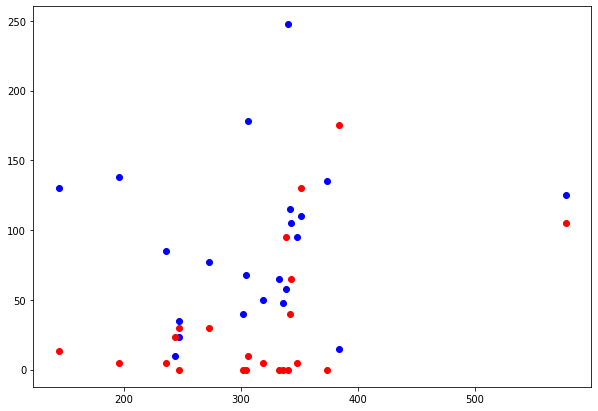

In [250]:
plt.figure(figsize = (10,7))
plt.scatter(columns_day1['Total Sleep Time (TST)'], columns_day1['Heavy'] , color = 'b')
plt.scatter(columns_day1['Total Sleep Time (TST)'], columns_day1['Large Screen Usage'] , color = 'r')

In [20]:
# fig = px.parallel_coordinates(renamed_columns_df, color="Duration [minutes]", labels={"Sleeping": "Sleeping",
#                 "Laying Down": "Laying Down", "Sitting": "Sitting",
#                 "Light Movement":"Light Movement", "Medium":"Medium", "Heavy":"Heavy", "Eating":"Eating", "Small Screen Usage":"Small Screen Usage", 
#                 "Large Screen Usage":"Large Screen Usage","Caffeinated Drink Consumption":"Caffeinated Drink Consumption", "Smoking":"Smoking","Alcohol Consumption":"Alcohol Consumption", },
#                              color_continuous_scale=px.colors.diverging.Tealrose,
#                              color_continuous_midpoint=2)
# fig.show()

In [21]:
for i in ['No activity','Sleeping', 'Laying Down', 'Sitting', 'Light Movement','Medium', 
                                          'Heavy', 'Eating', 'Small Screen Usage', 'Large Screen Usage'
                                          ,'Caffeinated Drink Consumption', 'Smoking','Alcohol Consumption']: 
    renamed_columns_df.loc[renamed_columns_df[i]==1, i]= renamed_columns_df.loc[renamed_columns_df[i]==1,'Duration [minutes]']
renamed_columns_df.head(30)

,Activity,Duration [minutes],User,No activity,Sleeping,Laying Down,Sitting,Light Movement,Medium,Heavy,Eating,Small Screen Usage,Large Screen Usage,Caffeinated Drink Consumption,Smoking,Alcohol Consumption
ID,,,,,,,,,,,,,,,,
0,2,22.0,1,0,0,22,0,0,0,0,0,0,0,0,0,0
1,9,3.0,1,0,0,0,0,0,0,0,0,0,3,0,0,0
2,10,5.0,1,0,0,0,0,0,0,0,0,0,0,5,0,0
3,6,5.0,1,0,0,0,0,0,0,5,0,0,0,0,0,0
4,2,20.0,1,0,0,20,0,0,0,0,0,0,0,0,0,0
5,7,60.0,1,0,0,0,0,0,0,0,60,0,0,0,0,0
6,4,5.0,1,0,0,0,0,5,0,0,0,0,0,0,0,0
7,10,5.0,1,0,0,0,0,0,0,0,0,0,0,5,0,0
8,3,5.0,1,0,0,0,5,0,0,0,0,0,0,0,0,0


In [22]:
renamed_drop=renamed_columns_df.drop(columns=['Activity', 'Duration [minutes]'])
#print(renamed_drop['Light Movement'])
renamed_group=renamed_drop.groupby(by='User').sum().reset_index()
renamed_group.head()

,User,No activity,Sleeping,Laying Down,Sitting,Light Movement,Medium,Heavy,Eating,Small Screen Usage,Large Screen Usage,Caffeinated Drink Consumption,Smoking,Alcohol Consumption
0,1,0.0,5.0,257.0,70.0,10.0,10.0,130.0,60.0,45.0,13.0,50.0,0.0,0.0
1,2,45.0,40.0,142.0,105.0,5.0,0.0,138.0,20.0,5.0,5.0,0.0,0.0,35.0
2,3,130.0,5.0,20.0,90.0,50.0,35.0,95.0,22.0,30.0,83.0,0.0,0.0,0.0
3,4,35.0,5.0,62.0,0.0,0.0,0.0,110.0,68.0,5.0,130.0,0.0,0.0,55.0
4,5,40.0,0.0,70.0,25.0,0.0,0.0,180.0,10.0,0.0,90.0,0.0,0.0,0.0


In [23]:
User_list = []

for num in range(1,23):
    user_data_df = pd.read_csv(f'DataPaper/user_{num}/user_info.csv')
    #stress_df = pd.read_csv(f'DataPaper/user_{num}/questionnaire.csv')
    user_data_df['User'] = num
    user_data_df.set_index(['User'])
#     user_sleep_df = user_sleep_df.merge(stress_df)
    User_list.append(user_data_df)
    
User_data= pd.concat(User_list)
User_data=User_data.drop('Unnamed: 0', axis=1)
User_data.head()

,Gender,Weight,Height,Age,User
0,M,65,169,29,1
0,M,95,183,27,2
0,M,70,174,34,3
0,M,76,180,27,4
0,M,80,196,25,5


In [24]:
from functools import reduce
merge_df = [User_data, renamed_group, stress_list_cleaned, sleep_df_cleaned]
merge_final = reduce(lambda left,right: pd.merge(left,right,on='User'), merge_df)
merge_final=merge_final.drop(columns='Gender')
merge_final = merge_final.astype(float)
merge_final.head()

,Weight,Height,Age,User,No activity,Sleeping,Laying Down,Sitting,Light Movement,Medium,...,Caffeinated Drink Consumption,Smoking,Alcohol Consumption,STAI1,STAI2,Pittsburgh,Daily_stress,Total Minutes in Bed,Total Sleep Time (TST),Number of Awakenings
0,65.0,169.0,29.0,1.0,0.0,5.0,257.0,70.0,10.0,10.0,...,50.0,0.0,0.0,41.0,43.0,5.0,23.0,165.0,144.0,9.0
1,65.0,169.0,29.0,1.0,0.0,5.0,257.0,70.0,10.0,10.0,...,50.0,0.0,0.0,41.0,43.0,5.0,23.0,213.0,196.0,9.0
2,95.0,183.0,27.0,2.0,45.0,40.0,142.0,105.0,5.0,0.0,...,0.0,0.0,35.0,24.0,39.0,7.0,26.0,332.0,244.0,18.0
3,70.0,174.0,34.0,3.0,130.0,5.0,20.0,90.0,50.0,35.0,...,0.0,0.0,0.0,27.0,27.0,8.0,11.0,443.0,351.0,16.0
4,76.0,180.0,27.0,4.0,35.0,5.0,62.0,0.0,0.0,0.0,...,0.0,0.0,55.0,28.0,40.0,4.0,10.0,373.0,319.0,28.0


In [120]:
px.scatter(merge_final, 'Total Sleep Time (TST)','Sitting', 'Anxiety')

In [52]:
pd.set_option('display.max_columns', None)
merge_corr=merge_final.corr()
filteredDf = merge_corr[((merge_corr >= .1) | (merge_corr <= -.1)) & (merge_corr !=1.000)]
filteredDf['Total Sleep Time (TST)']

Weight                          -0.176752
Height                                NaN
Age                             -0.109616
User                             0.190426
No activity                      0.165182
Sleeping                         0.330567
Laying Down                     -0.447568
Sitting                          0.293039
Light Movement                  -0.146340
Medium                           0.396661
Heavy                           -0.163191
Eating                                NaN
Small Screen Usage                    NaN
Large Screen Usage               0.155695
Caffeinated Drink Consumption   -0.334671
Smoking                               NaN
Alcohol Consumption              0.308496
STAI1                                 NaN
STAI2                           -0.132620
Pittsburgh                       0.339733
Daily_stress                     0.243392
Total Minutes in Bed             0.948625
Total Sleep Time (TST)           1.000000
Number of Awakenings              

In [100]:
fig = px.parallel_coordinates(merge_final, color='Anxiety',
                              dimensions=['Laying Down', 'Sitting', 'Light Movement','Medium', 
                                          'Heavy', 'Eating','Total Sleep Time (TST)'],
                              color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

In [99]:
#STAT1
# less than 31 may indicate low or no anxiety
# 31 and 49 an average level of anxiety or borderline levels
# scores higher than 50 a high level of anxiety or positive test results [2]
# for i in merge_final['STAI1']:
#     if i<31:
#         j ='Low'
#     elif (i>=31 and i<50):
#         j='Medium'
#     else:
#         j='High'
#     merge_final.loc[merge_final['STAI1']==i, 'STAI1']=j
# #Pittsburg
# #with values lower than 6 indicating good sleep quality

In [50]:
merge_final.head()

,Weight,Height,Age,User,No activity,Sleeping,Laying Down,Sitting,Light Movement,Medium,Heavy,Eating,Small Screen Usage,Large Screen Usage,Caffeinated Drink Consumption,Smoking,Alcohol Consumption,STAI1,Pittsburgh,Daily_stress,Total Minutes in Bed,Total Sleep Time (TST),Number of Awakenings
0,65.0,169.0,29.0,1.0,0.0,5.0,257.0,70.0,10.0,10.0,130.0,60.0,45.0,13.0,50.0,0.0,0.0,41.0,5.0,23.0,165.0,144.0,9.0
1,65.0,169.0,29.0,1.0,0.0,5.0,257.0,70.0,10.0,10.0,130.0,60.0,45.0,13.0,50.0,0.0,0.0,41.0,5.0,23.0,213.0,196.0,9.0
2,95.0,183.0,27.0,2.0,45.0,40.0,142.0,105.0,5.0,0.0,138.0,20.0,5.0,5.0,0.0,0.0,35.0,24.0,7.0,26.0,332.0,244.0,18.0
3,70.0,174.0,34.0,3.0,130.0,5.0,20.0,90.0,50.0,35.0,95.0,22.0,30.0,83.0,0.0,0.0,0.0,27.0,8.0,11.0,443.0,351.0,16.0
4,76.0,180.0,27.0,4.0,35.0,5.0,62.0,0.0,0.0,0.0,110.0,68.0,5.0,130.0,0.0,0.0,55.0,28.0,4.0,10.0,373.0,319.0,28.0


In [125]:
import statsmodels.api as sm
# Select your independent X terms, and your dependent y term. 
X = merge_final[['Anxiety', 'Laying Down','Sitting', 'Medium', 'Eating','Heavy', 'Light Movement', 'Small Screen Usage','Large Screen Usage','Caffeinated Drink Consumption','Smoking','Pittsburgh','Number of Awakenings']]
y = merge_final['Total Sleep Time (TST)']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
# Print the linear regression results
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     Total Sleep Time (TST)   R-squared:                       0.669
Model:                                OLS   Adj. R-squared:                  0.132
Method:                     Least Squares   F-statistic:                     1.245
Date:                    Mon, 25 Apr 2022   Prob (F-statistic):              0.389
Time:                            15:35:55   Log-Likelihood:                -116.10
No. Observations:                      22   AIC:                             260.2
Df Residuals:                           8   BIC:                             275.5
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

C:\Dell\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



In [246]:
px.bar(merge_final, 'Total Sleep Time (TST)','STAI1')

In [35]:
merge_final.head()

,Weight,Height,Age,User,No activity,Sleeping,Laying Down,Sitting,Light Movement,Medium,Heavy,Eating,Small Screen Usage,Large Screen Usage,Caffeinated Drink Consumption,Smoking,Alcohol Consumption,STAI1,Pittsburgh,Daily_stress,Total Minutes in Bed,Total Sleep Time (TST),Number of Awakenings
0,65.0,169.0,29.0,1.0,0.0,5.0,257.0,70.0,10.0,10.0,130.0,60.0,45.0,13.0,50.0,0.0,0.0,41.0,5.0,23.0,165.0,144.0,9.0
1,65.0,169.0,29.0,1.0,0.0,5.0,257.0,70.0,10.0,10.0,130.0,60.0,45.0,13.0,50.0,0.0,0.0,41.0,5.0,23.0,213.0,196.0,9.0
2,95.0,183.0,27.0,2.0,45.0,40.0,142.0,105.0,5.0,0.0,138.0,20.0,5.0,5.0,0.0,0.0,35.0,24.0,7.0,26.0,332.0,244.0,18.0
3,70.0,174.0,34.0,3.0,130.0,5.0,20.0,90.0,50.0,35.0,95.0,22.0,30.0,83.0,0.0,0.0,0.0,27.0,8.0,11.0,443.0,351.0,16.0
4,76.0,180.0,27.0,4.0,35.0,5.0,62.0,0.0,0.0,0.0,110.0,68.0,5.0,130.0,0.0,0.0,55.0,28.0,4.0,10.0,373.0,319.0,28.0


In [101]:
fig = px.parallel_coordinates(merge_final, color='Anxiety',
                              dimensions=['No activity','Anxiety','Total Sleep Time (TST)'],
                              color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

In [37]:
group1 = merge_final[merge_final["STAI1"] == ['Caffeinated Drink Consumption']["Total Sleep Time (TST)"]

In [38]:
sts.f_oneway(group1, group2, group3)

NameError: name 'group2' is not defined

In [ ]:
# Import the pairwise tukeyhsd function 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
# Run Pairwise Tukey HSD test.
tukey = pairwise_tukeyhsd(endog=merge_final["Total Sleep Time (TST)"],
                          groups=merge_final["STAI1"],
                          alpha=0.05)
print(tukey)